In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv('Traindata.csv')

<ipython-input-3-6f14578ee6ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

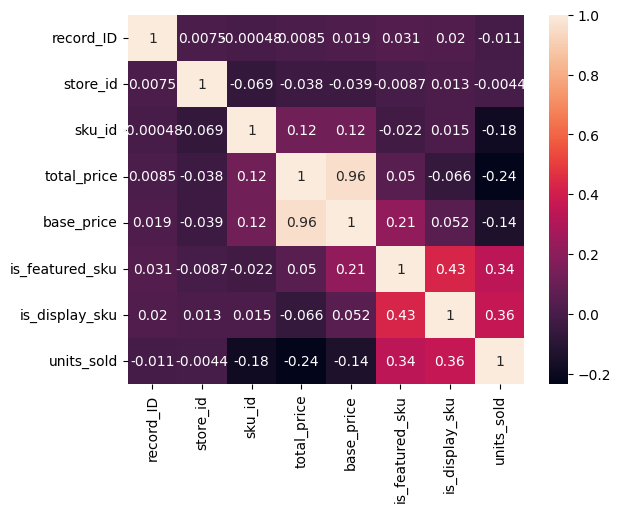

In [3]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)

In [4]:
data = data.drop(columns=['base_price'])

In [5]:
data

,record_ID,week,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold
0,1,17-01-2011,8091,216418,99.0375,0,0,20
1,2,17-01-2011,8091,216419,99.0375,0,0,28
2,3,17-01-2011,8091,216425,133.9500,0,0,19
3,4,17-01-2011,8091,216233,133.9500,0,0,44
4,5,17-01-2011,8091,217390,141.0750,0,0,52
...,...,...,...,...,...,...,...,...
150145,212638,09-07-2013,9984,223245,235.8375,0,0,38
150146,212639,09-07-2013,9984,223153,235.8375,0,0,30
150147,212642,09-07-2013,9984,245338,357.6750,1,1,31
150148,212643,09-07-2013,9984,547934,141.7875,0,1,12


In [6]:
data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [7]:
data.fillna(method='ffill', inplace=True)

In [8]:
data

,record_ID,week,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold
0,1,17-01-2011,8091,216418,99.0375,0,0,20
1,2,17-01-2011,8091,216419,99.0375,0,0,28
2,3,17-01-2011,8091,216425,133.9500,0,0,19
3,4,17-01-2011,8091,216233,133.9500,0,0,44
4,5,17-01-2011,8091,217390,141.0750,0,0,52
...,...,...,...,...,...,...,...,...
150145,212638,09-07-2013,9984,223245,235.8375,0,0,38
150146,212639,09-07-2013,9984,223153,235.8375,0,0,30
150147,212642,09-07-2013,9984,245338,357.6750,1,1,31
150148,212643,09-07-2013,9984,547934,141.7875,0,1,12


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'units_sold') ):
        col_list.append(col)

X = data[col_list]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           feature        VIF
0        record_ID   3.961019
1         store_id  14.356870
2           sku_id   9.507890
3      total_price   5.053904
4  is_featured_sku   1.364566
5   is_display_sku   1.425828


In [10]:
data.drop(columns = 'store_id', inplace = True, axis = 1)

In [11]:
x = data[['record_ID','sku_id','total_price','is_featured_sku','is_display_sku']]
y = data['units_sold']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 0)

In [13]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(x_train)
scaled_df = pd.DataFrame(X_scaled_train, columns=x_train.columns)
x_train = scaled_df

scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(x_test)
scaled_df = pd.DataFrame(X_scaled_test, columns=x_train.columns)
x_test = scaled_df

In [14]:
neighbours = np.arange(1,100,2)

In [15]:
neighbours = np.arange(1,200,2)
regression_rmse = []
r2_scores = []
for i in neighbours:
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    print(i)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
101
103
105
107
109
111
113
115
117
119
121
123
125
127
129
131
133
135
137
139
141
143
145
147
149
151
153
155
157
159
161
163
165
167
169
171
173
175
177
179
181
183
185
187
189
191
193
195
197
199


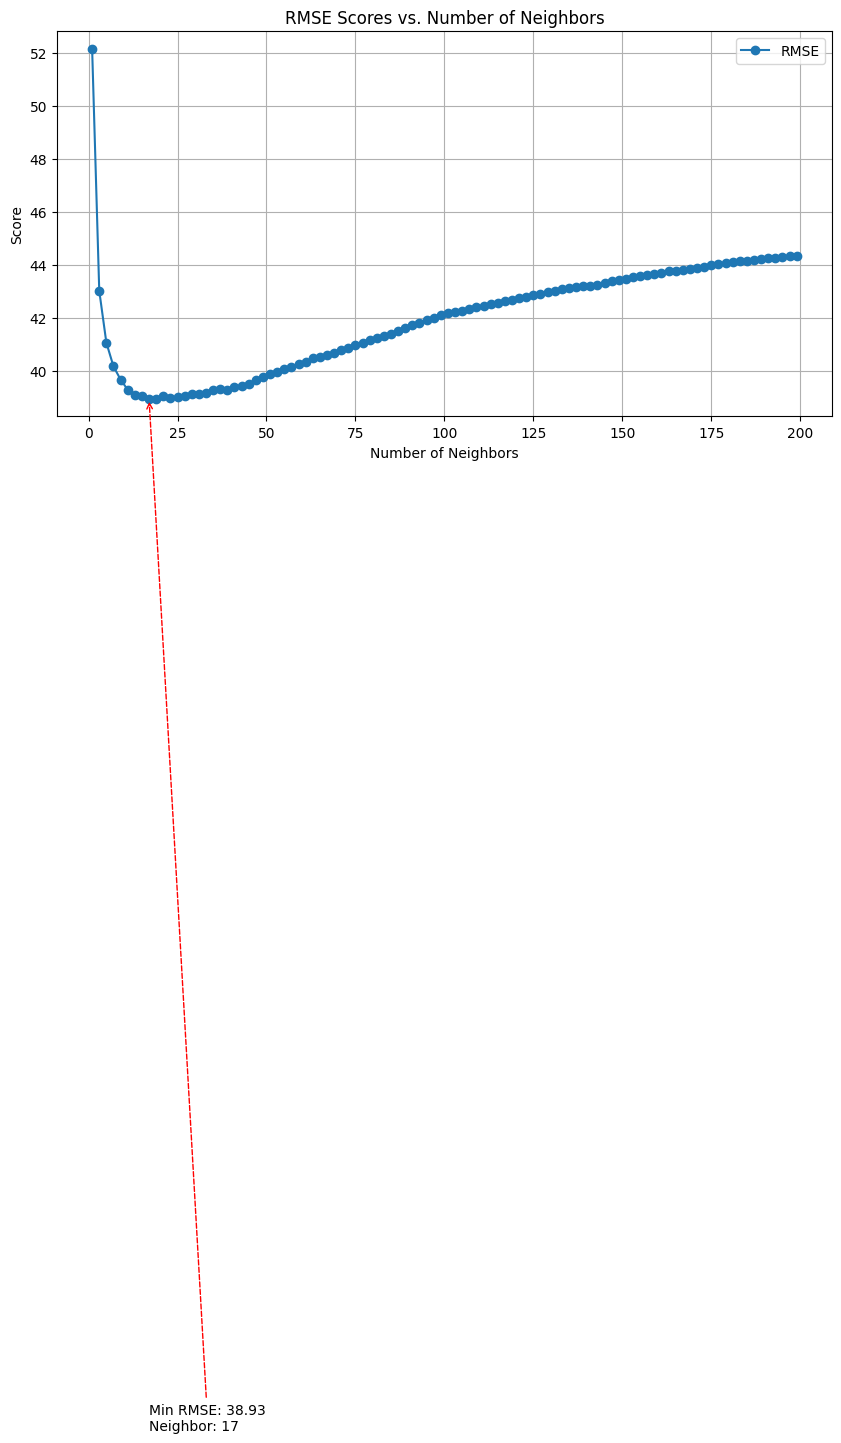

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(neighbours, regression_rmse, label='RMSE',marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('RMSE Scores vs. Number of Neighbors')
plt.grid()

min_rmse = min(regression_rmse)
min_neighbor = neighbours[regression_rmse.index(min_rmse)]

# Add a line from the lowest RMSE point to the x-axis
plt.annotate(f'Min RMSE: {min_rmse:.2f}\nNeighbor: {min_neighbor}',
             xy=(min_neighbor, min_rmse), xycoords='data',
             xytext=(min_neighbor, 0), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='red', linestyle='--'))

plt.show()

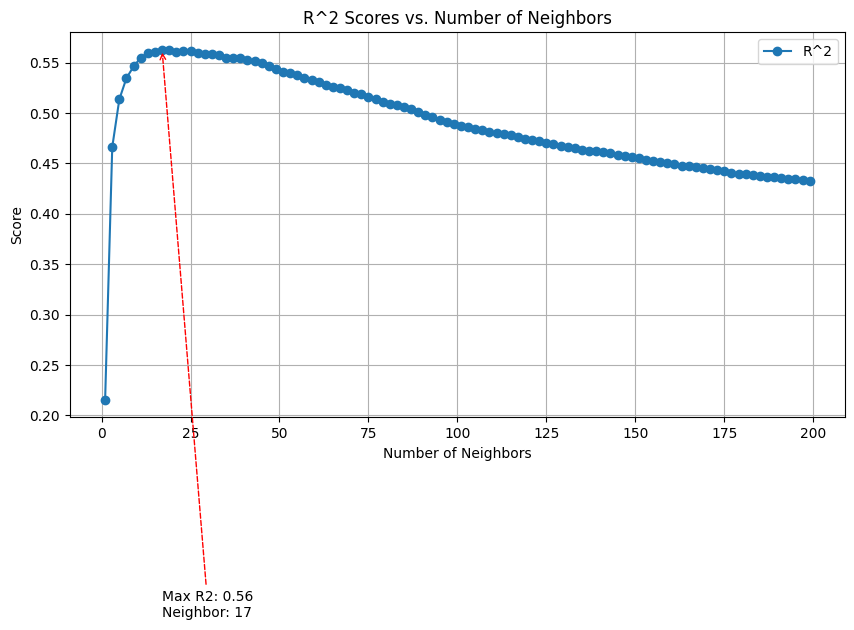

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(neighbours, r2_scores, label='R^2',marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('R^2 Scores vs. Number of Neighbors')
plt.grid()

max_r2 = max(r2_scores)
max_neighbor = neighbours[r2_scores.index(max_r2)]

# Add a line from the lowest RMSE point to the x-axis
plt.annotate(f'Max R2: {max_r2:.2f}\nNeighbor: {max_neighbor}',
             xy=(max_neighbor, max_r2), xycoords='data',
             xytext=(max_neighbor, 0), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='red', linestyle='--'))

plt.show()

In [18]:
p = np.arange(1,5,1)
regression_rmse = []
r2_scores = []
for i in p:
    model = KNeighborsRegressor(n_neighbors=17, p = i )
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    print(i)

1
2
3
4


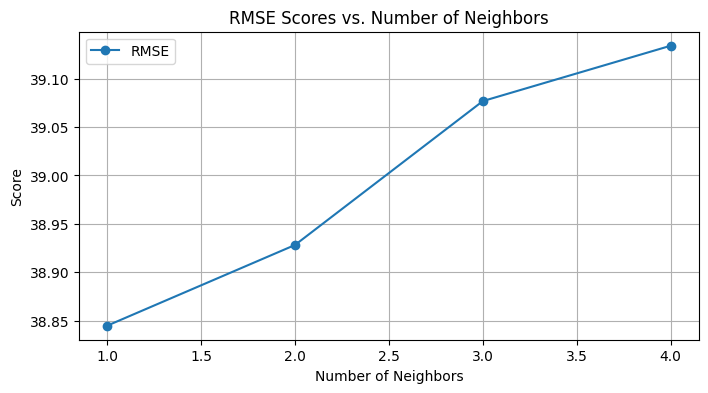

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(p, regression_rmse, label='RMSE',marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('RMSE Scores vs. Number of Neighbors')
plt.grid()

min_rmse = min(regression_rmse)
min_neighbor = p[regression_rmse.index(min_rmse)]


plt.show()

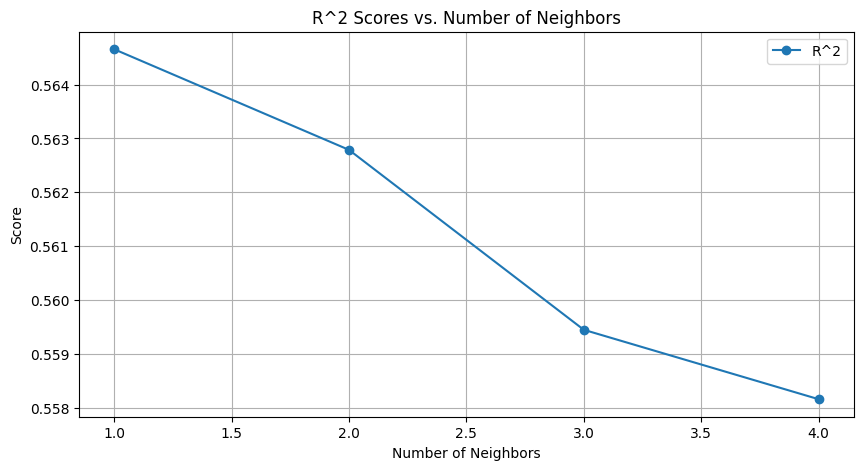

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(p, r2_scores, label='R^2',marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('R^2 Scores vs. Number of Neighbors')
plt.grid()

max_r2 = max(r2_scores)
max_neighbor = p[r2_scores.index(max_r2)]
plt.show()

In [21]:
model = KNeighborsRegressor(n_neighbors=17, p = 1 )
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
rmse= mean_squared_error(y_test, y_pred, squared=False)
r2_score = r2_score(y_test, y_pred)
print('RMSE: ',rmse)
print('R2: ',r2_score)

RMSE:  38.844890850128756
R2:  0.564656411224352


In [22]:
test = pd.read_csv('DataSetRetail.csv')
x_test = test[['record_ID','sku_id','total_price','is_featured_sku','is_display_sku']]

In [23]:
model = KNeighborsRegressor(n_neighbors=17, p = 1 )
model.fit(x,y)

KNeighborsRegressor(n_neighbors=17, p=1)

In [24]:
y_pred = model.predict(x_test)

In [25]:
submission = pd.DataFrame()
submission['record_ID'] = x_test['record_ID']
submission['units_sold'] = y_pred.astype(int)

In [26]:
submission

,record_ID,units_sold
0,212645,60
1,212646,60
2,212647,52
3,212648,56
4,212649,56
...,...,...
13855,232281,59
13856,232282,48
13857,232285,60
13858,232286,25


In [27]:
submission.to_csv('submission.csv')